In [ ]:
!pip install rdkit-pypi
!pip install mordred

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 45.5 MB/s eta 0:00:00
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176718 sha256=5d39ac613cf402d051c0649e59f2b13f00477fbe4019af96437dace2d9ae8e9f
  Stored in directory: /root/.cache/pip/wheels/8b/30/0b/84e3f6775306e74cf5957ee4d16b10bf3927dcec44cc23d5f2
Successfully built mordred
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.1 requires networkx>=3.0, but you have networkx 2.8.8 which is incompatible.
torc

In [ ]:
# https://www.rdkit.org/
#https://github.com/rdkit/rdkit
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

# https://pandas.pydata.org
import pandas as pd

# https://numpy.org/doc/stable/release.html
import numpy as np

#https://github.com/mordred-descriptor/mordred
from mordred import Calculator, descriptors

In [ ]:
# import session_info
# session_info.show()

In [ ]:
# https://zivgitlab.uni-muenster.de/m_kueh11/fp-dm-tool
# It was an excel file, but converted it to csv file
# It is the energy gap between HOMO-LUMO
url = '/content/Carcinogenicity_Carcinogenicity.csv'
dataset = pd.read_csv(url)
dataset.shape

(1021, 2)

In [ ]:
dataset.head()

,Canonical SMILES,labels
0,OC[C@@H](O)[C@@H](O)[C@H](O)[C@H](O)CO,0
1,O=[N+]([O-])OCC(CO[N+](=O)[O-])O[N+](=O)[O-],1
2,S=c1nc[nH]c2nc[nH]c12,0
3,Oc1c(Cl)cc(Cl)c(Cl)c1Cc1c(O)c(Cl)cc(Cl)c1Cl,0
4,O=c1[nH]cc(F)c(=O)[nH]1,0


Generate canonical SMILES

In [ ]:
# There might be one or more valid SMILES that can represent one compound
# Thanks to Pat Walters for this information,checkout his excellent blog: https://www.blogger.com/profile/18223198920629617711
def canonical_smiles(smiles):
    mols = [Chem.MolFromSmiles(smi) for smi in smiles]
    smiles = [Chem.MolToSmiles(mol) for mol in mols]
    return smiles

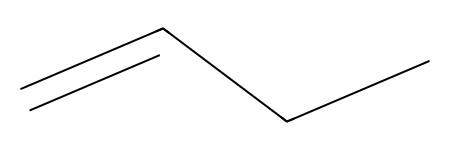

In [ ]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

Chem.MolFromSmiles('C=CCC')

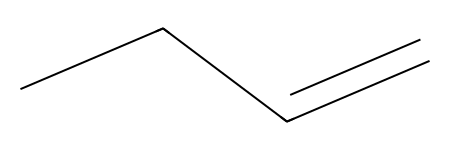

In [ ]:
Chem.MolFromSmiles('CCC=C')

In [ ]:
canonical_smiles(['C=CCC'])

['C=CCC']

In [ ]:
canonical_smiles(['CCC=C'])

['C=CCC']

In [ ]:
# Canonical SMILES
Canon_SMILES = canonical_smiles(dataset['Canonical SMILES']) # You need to call the function and pass the column as an argument.
len(Canon_SMILES)

# Put the smiles in the dataframe
dataset['Canonical SMILES'] = Canon_SMILES
dataset

,Canonical SMILES,labels
0,OC[C@@H](O)[C@@H](O)[C@H](O)[C@H](O)CO,0
1,O=[N+]([O-])OCC(CO[N+](=O)[O-])O[N+](=O)[O-],1
2,S=c1nc[nH]c2nc[nH]c12,0
3,Oc1c(Cl)cc(Cl)c(Cl)c1Cc1c(O)c(Cl)cc(Cl)c1Cl,0
4,O=c1[nH]cc(F)c(=O)[nH]1,0
...,...,...
1016,C=CC1=C(C)C2=CC3=NC(=C(CC(=O)[O-])C4=NC(=C(C)C...,0
1017,CC[NH2+]C(=O)N(CCN(C)C)N=O,1
1018,Cc1ccc(N/N=C2\C(=O)C(S(=O)(=O)[O-])=Cc3ccc(S(=...,1
1019,Nc1ccc(N=Nc2ccc(-c3ccc(N=Nc4c(S(=O)(=O)[O-])cc...,1


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=dataset)

https://docs.google.com/spreadsheets/d/1-zVe7H6x8QugHJbG3WDFRaFWGbymWP-BRgK7D7ECSSg#gid=0


In [ ]:
# Create a list for duplicate smiles
duplicates_smiles = dataset[dataset['Canonical SMILES'].duplicated()]['Canonical SMILES'].values
len(duplicates_smiles)

8

In [ ]:
# Get the duplicate SMILES
duplicate_smiles = dataset[dataset['Canonical SMILES'].duplicated(keep=False)]['Canonical SMILES'].unique()

# Display the duplicate SMILES
print(duplicate_smiles)


['NC(=O)OCC(COC(N)=O)c1ccccc1' 'NC1=NC(=O)C(c2ccccc2)O1'
 'c1ccc(Nc2ccc(Nc3ccccc3)cc2)cc1' 'Nc1ccc2ccccc2c1' 'O=Cc1ccco1'
 'CC(O)c1ccccc1' 'Nc1cccc(N)c1' 'CN(N=O)c1ccccc1']


In [ ]:
# Create a list for duplicate smiles
dataset[dataset['Canonical SMILES'].isin(duplicates_smiles)].sort_values(by=['Canonical SMILES'])

,Canonical SMILES,labels
322,CC(O)c1ccccc1,1
613,CC(O)c1ccccc1,1
451,CN(N=O)c1ccccc1,1
628,CN(N=O)c1ccccc1,1
13,NC(=O)OCC(COC(N)=O)c1ccccc1,1
597,NC(=O)OCC(COC(N)=O)c1ccccc1,1
145,NC1=NC(=O)C(c2ccccc2)O1,0
734,NC1=NC(=O)C(c2ccccc2)O1,0
292,Nc1ccc2ccccc2c1,1
709,Nc1ccc2ccccc2c1,1


**Drop** duplicate values

In [ ]:
dataset_new = dataset.drop_duplicates(subset=['Canonical SMILES'])
len(dataset_new)

1013

In [ ]:
dataset_new

,Canonical SMILES,labels
0,OC[C@@H](O)[C@@H](O)[C@H](O)[C@H](O)CO,0
1,O=[N+]([O-])OCC(CO[N+](=O)[O-])O[N+](=O)[O-],1
2,S=c1nc[nH]c2nc[nH]c12,0
3,Oc1c(Cl)cc(Cl)c(Cl)c1Cc1c(O)c(Cl)cc(Cl)c1Cl,0
4,O=c1[nH]cc(F)c(=O)[nH]1,0
...,...,...
1016,C=CC1=C(C)C2=CC3=NC(=C(CC(=O)[O-])C4=NC(=C(C)C...,0
1017,CC[NH2+]C(=O)N(CCN(C)C)N=O,1
1018,Cc1ccc(N/N=C2\C(=O)C(S(=O)(=O)[O-])=Cc3ccc(S(=...,1
1019,Nc1ccc(N=Nc2ccc(-c3ccc(N=Nc4c(S(=O)(=O)[O-])cc...,1


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=dataset_new)

https://docs.google.com/spreadsheets/d/13MShtZSmt4e5aCb85HJtDJ0rfsMNOTdWXTWReMcAfAY#gid=0


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=dataset_new)

https://docs.google.com/spreadsheets/d/116PGcjrv3f0pxkD3yjN44NgUKqu78j2FsOmYr0R3Nsw#gid=0


In [ ]:
calc = Calculator(descriptors, ignore_3D=True)


Calculate descreptors using Mordred-1826 descriptors

In [ ]:
# Extract SMILES column from the correct column (the column index will depend on your dataframe)
# In this case, column 0 is the 'Canonical SMILES'
smiles_list = df.iloc[:, 0].dropna().tolist()  # Drop NaN values if any

In [ ]:
import pandas as pd
from rdkit import Chem
from mordred import Calculator, descriptors
import os  # Import the os module

# Load dataset (update file path)
file_path = "final removed.csv"

# Check if the file exists
if not os.path.exists(file_path):
    print(f"Error: File '{file_path}' not found.")
    # Handle the error here (e.g., create the file or exit)
else:
    df = pd.read_csv(file_path)

    # Extract SMILES column (assuming it's the second column)
    smiles_list = df.iloc[:, 1].dropna().tolist()  # Drop NaN values if any

    # List of required Mordred descriptor names
    selected_descriptors = [
        "MW", "TopoPSA", "nRing", "nAromRing", "nHDon", "nHAcc", "Csp3", "nRotB", "nHeavyAtom", "nHetero",
        "WienerIndex", "J", "ZM1", "ZM2", "chi0", "chi1", "chi2", "ECC",
        "ALogP", "SLogP", "BP", "MP", "VP", "LogS", "pKa"
    ]

    # Initialize Mordred calculator
    calc = Calculator(descriptors, ignore_3D=True)

    # Convert SMILES to RDKit molecules
    molecules = [Chem.MolFromSmiles(smi) for smi in smiles_list]

    # Compute descriptors
    df_mordred = calc.pandas(molecules)

    # Select only the required descriptors (handling missing columns gracefully)
    df_selected = df_mordred.loc[:, df_mordred.columns.intersection(selected_descriptors)]

    # Save to CSV
    output_path = "selected_mordred_descriptors.csv"
    df_selected.to_csv(output_path, index=False)

    # Display the first few rows
    print(df_selected.head())

TypeError: No registered converter was able to produce a C++ rvalue of type std::basic_string<wchar_t, std::char_traits<wchar_t>, std::allocator<wchar_t> > from this Python object of type int

In [ ]:
import pandas as pd
from rdkit import Chem
from mordred import Calculator, descriptors
import os

file_path = "final removed.csv"

if not os.path.exists(file_path):
    print(f"Error: File '{file_path}' not found.")
else:
    df = pd.read_csv(file_path)
    smiles_list = df.iloc[:, 1].dropna().tolist()

    selected_descriptors = [
        "MW", "TopoPSA", "nRing", "nAromRing", "nHDon", "nHAcc", "Csp3", "nRotB", "nHeavyAtom", "nHetero","nN","nB","nF","nCl","nBr","nI",
        "WienerIndex", "J", "Zagreb1", "Zagreb2", "chi0", "chi1", "chi2", "ECC","LogS","kappa1 ","kappa2 ","kappa3","ECC ","SpAbs_DzZ", "SpMax_DzZ",
        "ALogP", "SLogP", "BP", "MP", "VP", "LogS", "pKa","JGI1","JGI1","JGI2","JGI3","JGI4","JGI5","JGI6","JGI7","JGI8","JGI9","JGI10","JGT10","WPath",
    ]

    calc = Calculator(descriptors, ignore_3D=True)
    molecules = [Chem.MolFromSmiles(smi) for smi in smiles_list]

    # Debug: Check for invalid SMILES
    invalid_smiles = [smi for smi, mol in zip(smiles_list, molecules) if mol is None]
    if invalid_smiles:
        print(f"Warning: {len(invalid_smiles)} invalid SMILES found. They will be skipped.")

    df_mordred = calc.pandas(molecules)

    # Debug: Check available descriptors
    available_descriptors = df_mordred.columns.tolist()
    print("Available descriptors:\n", available_descriptors)

    # Debug: Check missing descriptors
    missing_descriptors = [desc for desc in selected_descriptors if desc not in available_descriptors]
    if missing_descriptors:
        print("Warning: The following descriptors are missing and will be skipped:\n", missing_descriptors)

    df_selected = df_mordred.loc[:, df_mordred.columns.intersection(selected_descriptors)]
    output_path = "selected_mordred_descriptors.csv"
    df_selected.to_csv(output_path, index=False)

    print(df_selected.head())

TypeError: No registered converter was able to produce a C++ rvalue of type std::basic_string<wchar_t, std::char_traits<wchar_t>, std::allocator<wchar_t> > from this Python object of type int

In [ ]:
import pandas as pd
from rdkit import Chem
from mordred import Calculator, descriptors
import os

file_path = "final clear data.csv"

if not os.path.exists(file_path):
    print(f"Error: File '{file_path}' not found.")
else:
    df = pd.read_csv(file_path)

    # Ensure SMILES are strings
    smiles_list = df.iloc[:, 1].dropna().astype(str).tolist()

    # Convert SMILES to RDKit molecules
    molecules = [Chem.MolFromSmiles(smi) for smi in smiles_list]
    valid_molecules = [mol for mol in molecules if mol is not None]  # Remove None values

    # Check for invalid SMILES
    invalid_smiles_count = len(smiles_list) - len(valid_molecules)
    if invalid_smiles_count > 0:
        print(f"Warning: {invalid_smiles_count} invalid SMILES found and skipped.")

    if not valid_molecules:
        raise ValueError("No valid molecules found. Check your SMILES data!")

    # Correct descriptor names
    selected_descriptors = [
        "MW", "TopoPSA", "nRing", "nAromRing", "nHDon", "nHAcc", "Csp3", "nRotB", "nHeavyAtom", "nHetero",
        "nN", "nB", "nF", "nCl", "nBr", "nI",  # Atom counts
        "J", "ZM1", "ZM2", "chi0", "chi1", "chi2", "ECC", "WPath",  # Topological indices
        "LogS", "kappa1", "kappa2", "kappa3", "SpAbs_DzZ", "SpMax_DzZ",  # Shape & logP descriptors
        "ALogP", "SLogP", "BP", "MP", "VP", "pKa",  # Physicochemical properties
        "JGI1", "JGI2", "JGI3", "JGI4", "JGI5", "JGI6", "JGI7", "JGI8", "JGI9", "JGI10", "JGT10"  # Charge indices
    ]

    # Initialize Mordred
    calc = Calculator(descriptors, ignore_3D=True)

    # Compute descriptors
    df_mordred = calc.pandas(valid_molecules)

    # Check available descriptors
    available_descriptors = df_mordred.columns.tolist()

    # Check missing descriptors
    missing_descriptors = [desc for desc in selected_descriptors if desc not in available_descriptors]
    if missing_descriptors:
        print("Warning: The following descriptors are missing and will be skipped:\n", missing_descriptors)

    # Select only valid descriptors
    df_selected = df_mordred.loc[:, df_mordred.columns.intersection(selected_descriptors)]

    # Save to CSV
    output_path = "selected_mordred_descriptors.csv"
    df_selected.to_csv(output_path, index=False)

    print(df_selected.head())


[16:47:11] SMILES Parse Error: syntax error while parsing: 0
[16:47:11] SMILES Parse Error: Failed parsing SMILES '0' for input: '0'
[16:47:11] SMILES Parse Error: syntax error while parsing: 1
[16:47:11] SMILES Parse Error: Failed parsing SMILES '1' for input: '1'
[16:47:11] SMILES Parse Error: syntax error while parsing: 0
[16:47:11] SMILES Parse Error: Failed parsing SMILES '0' for input: '0'
[16:47:11] SMILES Parse Error: syntax error while parsing: 0
[16:47:11] SMILES Parse Error: Failed parsing SMILES '0' for input: '0'
[16:47:11] SMILES Parse Error: syntax error while parsing: 0
[16:47:11] SMILES Parse Error: Failed parsing SMILES '0' for input: '0'
[16:47:11] SMILES Parse Error: syntax error while parsing: 0
[16:47:11] SMILES Parse Error: Failed parsing SMILES '0' for input: '0'
[16:47:11] SMILES Parse Error: syntax error while parsing: 0
[16:47:11] SMILES Parse Error: Failed parsing SMILES '0' for input: '0'
[16:47:11] SMILES Parse Error: syntax error while parsing: 1
[16:47:1

ValueError: No valid molecules found. Check your SMILES data!

In [ ]:
import pandas as pd
from rdkit import Chem
from mordred import Calculator, descriptors
import os

file_path = "final clear data.csv"

if not os.path.exists(file_path):
    print(f"Error: File '{file_path}' not found.")
else:
    df = pd.read_csv(file_path)

    # Ensure SMILES are strings and check for empty or invalid SMILES
    # Updated: Changed to column 0 for 'Canonical SMILES'
    smiles_list = df.iloc[:, 0].dropna().astype(str).tolist()
    valid_smiles_list = [smi for smi in smiles_list if smi != '' and Chem.MolFromSmiles(smi) is not None]

    if not valid_smiles_list:
        raise ValueError("No valid molecules found after checking for empty/invalid SMILES. Please review your data!")

    # Continue with Mordred calculations using valid_smiles_list
    # ... (rest of your code to calculate and save Mordred descriptors)
    selected_descriptors = [
        "MW", "TopoPSA", "nRing", "nAromRing", "nHDon", "nHAcc", "Csp3", "nRotB", "nHeavyAtom", "nHetero",
        "nN", "nB", "nF", "nCl", "nBr", "nI",  # Atom counts
        "J", "ZM1", "ZM2", "chi0", "chi1", "chi2", "ECC", "WPath",  # Topological indices
        "LogS", "kappa1", "kappa2", "kappa3", "SpAbs_DzZ", "SpMax_DzZ",  # Shape & logP descriptors
        "ALogP", "SLogP", "BP", "MP", "VP", "pKa",  # Physicochemical properties
        "JGI1", "JGI2", "JGI3", "JGI4", "JGI5", "JGI6", "JGI7", "JGI8", "JGI9", "JGI10", "JGT10"  # Charge indices
    ]

    # Initialize Mordred
    calc = Calculator(descriptors, ignore_3D=True)

    # Compute descriptors using valid_smiles_list
    molecules = [Chem.MolFromSmiles(smi) for smi in valid_smiles_list] # Use valid_smiles_list here
    df_mordred = calc.pandas(molecules)

    # ... (rest of the code to select, save and print descriptors)

 83%|████████▎ | 838/1013 [01:47<00:18,  9.69it/s]

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|██████████| 1013/1013 [02:15<00:00,  7.50it/s]


In [ ]:
import pandas as pd
from rdkit import Chem
from mordred import Calculator, descriptors
import os

file_path = "final clear data.csv"  # Replace with your actual file path

if not os.path.exists(file_path):
    print(f"Error: File '{file_path}' not found.")
else:
    df = pd.read_csv(file_path)

    # Ensure SMILES are strings and check for empty or invalid SMILES
    smiles_list = df.iloc[:, 0].dropna().astype(str).tolist()  # Changed to column 0 for 'Canonical SMILES'
    valid_smiles_list = [smi for smi in smiles_list if smi != '' and Chem.MolFromSmiles(smi) is not None]

    if not valid_smiles_list:
        raise ValueError("No valid molecules found after checking for empty/invalid SMILES. Please review your data!")

    # List of desired Mordred descriptor names
    selected_descriptors = [
        "MW", "TopoPSA", "nRing", "nAromRing", "nHDon", "nHAcc", "Csp3", "nRotB", "nHeavyAtom", "nHetero",
        "nN", "nB", "nF", "nCl", "nBr", "nI",  # Atom counts
        "J", "ZM1", "ZM2", "chi0", "chi1", "chi2", "ECC", "WPath",  # Topological indices
        "LogS", "kappa1", "kappa2", "kappa3", "SpAbs_DzZ", "SpMax_DzZ",  # Shape & logP descriptors
        "ALogP", "SLogP", "BP", "MP", "VP", "pKa",  # Physicochemical properties
        "JGI1", "JGI2", "JGI3", "JGI4", "JGI5", "JGI6", "JGI7", "JGI8", "JGI9", "JGI10", "JGT10"  # Charge indices
    ]

    # Initialize Mordred calculator
    calc = Calculator(descriptors, ignore_3D=True)

    # Compute descriptors using valid SMILES
    molecules = [Chem.MolFromSmiles(smi) for smi in valid_smiles_list]
    df_mordred = calc.pandas(molecules)

    # Check available descriptors
    available_descriptors = df_mordred.columns.tolist()

    # Check missing descriptors
    missing_descriptors = [desc for desc in selected_descriptors if desc not in available_descriptors]
    if missing_descriptors:
        print("Warning: The following descriptors are missing and will be skipped:\n", missing_descriptors)

    # Select only valid and desired descriptors
    df_selected = df_mordred.loc[:, df_mordred.columns.intersection(selected_descriptors)]

    # Save selected descriptors to CSV
    output_path = "selected_mordred_descriptors.csv"  # Choose your output file name
    df_selected.to_csv(output_path, index=False)

    print(df_selected.head())  # Display the first few rows of the selected descriptors
    print(f"Selected Mordred descriptors saved to '{output_path}'")

 83%|████████▎ | 837/1013 [01:42<00:16, 10.87it/s]

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|██████████| 1013/1013 [02:09<00:00,  7.85it/s]


 ['nAromRing', 'nHDon', 'nHAcc', 'Csp3', 'nRotB', 'J', 'ZM1', 'ZM2', 'chi0', 'chi1', 'chi2', 'ECC', 'LogS', 'kappa1', 'kappa2', 'kappa3', 'ALogP', 'BP', 'MP', 'VP', 'pKa']
   nHeavyAtom  nHetero  nB  nN  nF  nCl  nBr  nI   SpAbs_DzZ  SpMax_DzZ  ...  \
0          12        6   0   0   0    0    0   0   64.147768  32.823884  ...   
1          15       12   0   3   0    0    0   0   82.445972  42.562272  ...   
2          10        5   0   4   0    0    0   0   23.117803  12.024132  ...   
3          21        8   0   0   0    6    0   0  114.676123  59.529238  ...   
4           9        5   0   2   1    0    0   0   20.703072  10.911060  ...   

       JGI4      JGI5      JGI6      JGI7     JGI8  JGI9  JGI10     JGT10  \
0  0.040000  0.020833  0.010204  0.000000  0.00000   0.0    0.0  0.564995   
1  0.048000  0.024306  0.031397  0.010417  0.00000   0.0    0.0  0.545550   
2  0.047619  0.000000  0.000000  0.000000  0.00000   0.0    0.0  0.319747   
3  0.061037  0.026175  0.023440  0.0156

In [ ]:
# Check available descriptors
    available_descriptors = df_mordred.columns.tolist()

    # Check missing descriptors
    missing_descriptors = [desc for desc in selected_descriptors if desc not in available_descriptors]
    if missing_descriptors:
        print("Warning: The following descriptors are missing and will be skipped:\n", missing_descriptors)

    # Select only valid descriptors
    df_selected = df_mordred.loc[:, df_mordred.columns.intersection(selected_descriptors)]

    # Save to CSV
    output_path = "selected_mordred_descriptors.csv"
    df_selected.to_csv(output_path, index=False)

    print(df_selected.head())


IndentationError: unexpected indent (<ipython-input-42-0c34b3f1664f>, line 2)

In [ ]:
def All_Mordred_descriptors(data):
    calc = Calculator(descriptors, ignore_3D=False)
    mols = [Chem.MolFromSmiles(smi) for smi in data]

    # pandas df
    df = calc.pandas(mols)
    return df

In [ ]:
# This assumes that 'dataset' was already created and modified as dataset_new
# in a previous cell.
dataset_new = dataset.drop_duplicates(subset=['Canonical SMILES']) # Example operation to create dataset_new

mordred_descriptors = All_Mordred_descriptors(dataset_new['Canonical SMILES'])

 82%|████████▏ | 831/1013 [02:05<01:35,  1.90it/s]

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 95%|█████████▌| 964/1013 [02:26<00:20,  2.43it/s]

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|██████████| 1013/1013 [02:44<00:00,  6.15it/s]


In [ ]:
mordred_descriptors.shape

(1013, 1826)

In [ ]:
mordred_descriptors

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,14.195669,2.246980,4.493959,14.195669,1.182972,3.323381,...,8.896041,41.551399,182.079038,7.003040,206,16,50.0,55.0,6.944444,3.000000
1,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,16.685269,2.157647,4.315295,16.685269,1.112351,3.542216,...,8.707648,44.833687,227.002579,11.350129,424,14,62.0,62.0,7.694444,3.500000
2,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,13.098358,2.369838,4.633950,13.098358,1.309836,3.261311,...,9.161465,53.745115,152.015667,10.858262,105,12,52.0,61.0,2.833333,2.222222
3,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,25.526490,2.449490,4.898979,25.526490,1.215547,3.963270,...,10.114761,55.247447,403.849896,14.957404,860,38,110.0,132.0,9.861111,4.555556
4,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,0,10.792280,2.245827,4.491654,10.792280,1.199142,3.099448,...,8.806724,37.839725,130.017856,10.834821,84,10,42.0,46.0,4.083333,2.027778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,5,0,54.765888,2.549431,4.911782,54.765888,1.244679,4.720257,...,10.803385,100.295945,591.227103,7.883028,5813,81,240.0,293.0,17.222222,9.583333
1009,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,0,2,14.671331,2.179633,4.359266,14.671331,1.128564,3.394537,...,8.657824,42.197422,189.134602,6.304487,280,14,52.0,54.0,6.583333,3.277778
1010,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,2,0,34.882735,2.510401,5.020802,34.882735,1.202853,4.296814,...,10.481027,65.058953,434.025340,10.093613,2164,50,158.0,186.0,12.375000,5.972222
1011,module 'numpy' has no attribute 'float'.\n`np....,module 'numpy' has no attribute 'float'.\n`np....,2,0,65.751143,2.556338,5.112676,65.751143,1.264445,4.882786,...,10.994488,90.819702,735.132933,9.547181,12962,90,282.0,333.0,17.902778,11.000000


In [ ]:
mordred_descriptors.to_csv('mordred_descriptors.csv', index=False)


In [ ]:
print("Mordred descriptors have been saved to 'mordred_descriptors.csv'.")


Mordred descriptors have been saved to 'mordred_descriptors.csv'.


STEP 2:Carcino preprocess

NON NUMERIC COLUMNS

In [ ]:

import pandas as pd

# Step 1: Load the dataset using error_bad_lines=False to skip the problematic line
data = pd.read_csv('mordred_descriptors.csv', error_bad_lines=False)  # or on_bad_lines='skip'

# ... (Rest of your code remains the same)

# Step 2: Identify non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=['number']).columns.tolist()

# Step 3: Drop non-numeric columns from the dataset
data_numeric = data.select_dtypes(include=['number'])

# Step 4: Save the removed non-numeric columns to a CSV file
removed_descriptors_df = pd.DataFrame(non_numeric_columns, columns=['Removed_Descriptors'])
removed_descriptors_df.to_csv('removed_descriptors.csv', index=False)

# Step 5: Save the cleaned numeric descriptors to a new CSV file (optional)
data_numeric.to_csv('numeric_descriptors.csv', index=False)

# Step 6: Output the count of removed descriptors
print(f"Number of Removed Non-Numeric Descriptors: {len(non_numeric_columns)}")
print(f"Removed Descriptors saved to 'removed_descriptors.csv'")

TypeError: read_csv() got an unexpected keyword argument 'error_bad_lines'

NULL VALUES

In [ ]:
# Step 1: Load the numeric dataset (replace with your actual file)
data_numeric = pd.read_csv('numeric_descriptors.csv')

# Step 2: Identify all-zero columns (descriptors where all values are zero)
all_zero_columns = data_numeric.columns[(data_numeric == 0).all()].tolist()

# Step 3: Create a DataFrame with the removed all-zero descriptors and their values
removed_zero_descriptors = data_numeric[all_zero_columns]

# Step 4: Drop the all-zero columns from the dataset
final_data_cleaned = data_numeric.drop(columns=all_zero_columns)

# Step 5: Save the removed all-zero descriptors and their values to a CSV file
removed_zero_descriptors.to_csv('removed_zero_descriptors.csv', index=False)

# Step 6: Save the final cleaned numeric descriptors to a new CSV file
final_data_cleaned.to_csv('final_cleaned_numeric_descriptors.csv', index=False)

# Step 7: Output the count of removed all-zero descriptors
print(f"Number of Removed All-Zero Descriptors: {len(all_zero_columns)}")
print(f"Removed All-Zero Descriptors saved to 'removed_zero_descriptors.csv'")
print(f"Final cleaned numeric descriptors saved to 'final_cleaned_numeric_descriptors.csv'")

Number of Removed All-Zero Descriptors: 0
Removed All-Zero Descriptors saved to 'removed_zero_descriptors.csv'
Final cleaned numeric descriptors saved to 'final_cleaned_numeric_descriptors.csv'


In [ ]:
final_cleaned_numeric_descriptors= pd.read_csv('final_cleaned_numeric_descriptors.csv')
final_cleaned_numeric_descriptors

,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,VE2_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,0,0,14.195669,2.246980,4.493959,14.195669,1.182972,3.323381,3.091778,0.257648,...,8.896041,41.551399,182.079038,7.003040,206.0,16.0,50.0,55.0,6.944444,3.000000
1,0,0,16.685269,2.157647,4.315295,16.685269,1.112351,3.542216,3.446110,0.229741,...,8.707648,44.833687,227.002579,11.350129,424.0,14.0,62.0,62.0,7.694444,3.500000
2,0,0,13.098358,2.369838,4.633950,13.098358,1.309836,3.261311,3.026081,0.302608,...,9.161465,53.745115,152.015667,10.858262,105.0,12.0,52.0,61.0,2.833333,2.222222
3,0,0,25.526490,2.449490,4.898979,25.526490,1.215547,3.963270,4.218889,0.200899,...,10.114761,55.247447,403.849896,14.957404,860.0,38.0,110.0,132.0,9.861111,4.555556
4,0,0,10.792280,2.245827,4.491654,10.792280,1.199142,3.099448,2.862787,0.318087,...,8.806724,37.839725,130.017856,10.834821,84.0,10.0,42.0,46.0,4.083333,2.027778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0,0,22.216228,2.501530,4.835282,22.216228,1.306837,3.789439,3.632193,0.213658,...,9.846864,64.490060,223.099714,7.436657,485.0,26.0,92.0,110.0,4.916667,3.694444
1139,0,0,5.464102,1.732051,3.464102,5.464102,1.092820,2.390167,2.154701,0.430940,...,6.192362,25.583106,71.037114,7.103711,20.0,2.0,14.0,12.0,2.750000,1.500000
1140,0,0,30.653759,2.613447,5.132504,30.653759,1.332772,4.131472,4.384815,0.190644,...,10.482766,75.813436,314.079038,8.488623,999.0,44.0,138.0,176.0,6.472222,4.861111
1141,0,0,13.544150,2.179190,4.358380,13.544150,1.128679,3.322647,2.999261,0.249938,...,8.734399,41.260507,190.077599,7.310677,233.0,12.0,50.0,51.0,6.423611,2.916667


In [ ]:
import pandas as pd

# Load the full Mordred descriptor dataset
file_path = "final_cleaned_numeric_descriptors.csv"  # Update with your file path
df = pd.read_csv(file_path)

# List of 50 important descriptors
important_features = [
    "GATS3se", "ATSC7dv", "MATS2i", "MATS3se", "BIC3", "ATSC1pe", "ATSC4d", "ATSC6pe", "GATS2i", "VSA_EState6",
    "ATSC7s", "ATSC1i", "MATS3p", "ATSC6i", "ATSC5Z", "ATSC7pe", "GATS4se", "ATSC5pe", "BIC5", "GATS1se",
    "AATS2se", "GATS3s", "ATSC7m", "AATSC4p", "AATSC3s", "AATSC2se", "ATSC6are", "ATSC2i", "MATS4se", "AATSC0pe",
    "ETA_shape_y", "ATSC6v", "AATSC0se", "MATS4p", "ATSC5i", "ATSC6Z", "GATS4d", "ATSC2se", "GATS3pe", "ZMIC5",
    "BCUTare-1l", "ATSC3m", "ATSC5s", "ATSC5m", "MATS4s", "ATSC5are", "ATSC3pe", "MATS2s", "ATSC7v", "BIC2"
]

# Extract only the important features
df_important = df[important_features]

# Save the filtered dataset
df_important.to_csv("important_descriptors.csv", index=False)
print("Filtered dataset saved as 'important_descriptors.csv'")


Filtered dataset saved as 'important_descriptors.csv'


STEP 3:CARCINO FEATURE SELECTION

1.VARIENCE THRESHOLD

Applies VarianceThreshold to remove low-variance descriptors.

In [ ]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

# Assuming 'descriptors_df' is your DataFrame with Mordred descriptors
df = pd.read_csv('final_cleaned_numeric_descriptors.csv')


# Set the variance threshold (you can adjust the threshold value as needed)
threshold = 0.5
selector = VarianceThreshold(threshold=threshold)

# Fit the selector to the data
# Changed: Replaced 'final_cleaned_numeric_descriptors' with 'df'
selector.fit(df) # Use the DataFrame 'df' here

# Get the mask of selected features (those with variance above the threshold)
selected_mask = selector.get_support()

# Get the selected descriptors (those with variance above the threshold)
# Changed: Replaced 'final_cleaned_numeric_descriptors' with 'df'
selected_descriptors = df.columns[selected_mask] # Use the DataFrame 'df' here

# Get the removed descriptors (those with variance below the threshold)
# Changed: Replaced 'final_cleaned_numeric_descriptors' with 'df'
removed_descriptors = df.columns[~selected_mask] # Use the DataFrame 'df' here

# Count the number of selected and removed descriptors
selected_count = len(selected_descriptors)
removed_count = len(removed_descriptors)

# Output the results
print(f"Selected descriptors count: {selected_count}")
print(f"Removed descriptors count: {removed_count}")

# Save the removed descriptors to a CSV file
# Assuming 'descriptors_df' is the original DataFrame
# Changed: Replaced 'descriptors_df' with 'df' to use the loaded DataFrame
removed_descriptors_df = df[removed_descriptors] # Use the DataFrame 'df' here
removed_descriptors_df.to_csv('removed_descriptors.csv', index=False)

# Optionally, you can also save the selected descriptors
# Assuming 'descriptors_df' is the original DataFrame
# Changed: Replaced 'descriptors_df' with 'df' to use the loaded DataFrame
selected_descriptors_df = df[selected_descriptors] # Use the DataFrame 'df' here
selected_descriptors_df.to_csv('selected_descriptors.csv', index=False)

print("Removed descriptors saved to 'removed_descriptors.csv'")
print("Selected descriptors saved to 'selected_descriptors.csv'")

Selected descriptors count: 628
Removed descriptors count: 444
Removed descriptors saved to 'removed_descriptors.csv'
Selected descriptors saved to 'selected_descriptors.csv'


In [ ]:
import pandas as pd

# Load your dataset (replace 'data.csv' with your file path)
dfs = pd.read_csv('selected_descriptors.csv')

# Step 1: Calculate the correlation matrix
correlation_matrix = dfs.corr().abs()  # Use absolute values to consider both positive and negative correlations

# Step 2: Identify pairs of correlated features
threshold = 0.8  # Set your threshold for correlation
to_drop = set()  # Set to hold features to drop

# Loop through the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] > threshold:  # Check if correlation exceeds threshold
            # Drop the feature with the lower variance
            colname = correlation_matrix.columns[i]
            if colname not in to_drop:  # Avoid dropping multiple times
                to_drop.add(colname)

# Step 3: Remove the correlated features from the DataFrame
X_selected = dfs.drop(columns=to_drop)

# Change: Convert 'to_drop' to a list before using it in .loc[]
X_removed = dfs.loc[:, list(to_drop)]  # Get the removed features

# Count the number of features remaining and removed
removed_count = len(to_drop)
selected_count = X_selected.shape[1]

# Print the counts
print(f"Number of removed descriptors: {removed_count}")
print(f"Number of selected descriptors: {selected_count}")

# Save the removed and selected descriptors to CSV files
X_removed.to_csv('removed_descriptors_with_values.csv', index=False)
X_selected.to_csv('selected_descriptors_with_values.csv', index=False)

# Save the counts to a separate file
with open('descriptor_counts.txt', 'w') as f:
    f.write(f"Number of removed descriptors: {removed_count}\n")
    f.write(f"Number of selected descriptors: {selected_count}\n")

print("Removed descriptors saved to 'removed_descriptors_with_values.csv'.")
print("Selected descriptors saved to 'selected_descriptors_with_values.csv'.")
print("Descriptor counts saved to 'descriptor_counts.txt'.")

Number of removed descriptors: 555
Number of selected descriptors: 185
Removed descriptors saved to 'removed_descriptors_with_values.csv'.
Selected descriptors saved to 'selected_descriptors_with_values.csv'.
Descriptor counts saved to 'descriptor_counts.txt'.


Code to Merge the Descriptors and Labels

In [ ]:
import pandas as pd
# Assuming 'original_df' contains the original dataset with SMILES and labels (toxicity)
# Load the original dataset from your file (replace 'your_file.csv' with the actual file path)
original_df = pd.read_csv('original_df.csv')  # Assuming your original data is in a CSV file

# 'original_df' columns: ["SMILES", "Label"]
# Assuming 'selected_descriptors_df' is the DataFrame containing the selected Mordred descriptors
# 'descriptors_df' (before feature selection) and 'selected_descriptors_df' are aligned row-wise with 'original_df'

# Load or create the selected_descriptors_df DataFrame here
# Replace 'selected_descriptors.csv' with the actual file path if loading from a file
selected_descriptors_df = pd.read_csv('selected_descriptors_with_values.csv')  # Example: Loading from a CSV file

# Ensure that 'selected_descriptors_df' and 'original_df' have matching row order (e.g., SMILES align correctly)

# Extract the labels from the original dataset
# Assuming 'Label' is the column containing toxicity labels
labels = original_df['labels']

# Combine selected descriptors with the target labels
X = selected_descriptors_df  # Use the DataFrame directly
y = labels  # This is your target variable (toxicity labels)
print(X,y)

     nAcid  nBase    SpAbs_A  SpDiam_A       VR1_A  nAromAtom  nBridgehead  \
0        0      0  14.195669  4.493959   42.121320          0            0   
1        0      0  16.685269  4.315295   63.448323          0            0   
2        0      0  13.098358  4.633950   35.990740          9            0   
3        0      0  25.526490  4.898979  103.915046         12            0   
4        0      0  10.792280  4.491654   26.534691          6            0   
..     ...    ...        ...       ...         ...        ...          ...   
323      0      0  11.189957  4.387987   27.609117          6            0   
324      0      0  17.567798  4.716589   63.561942          6            0   
325      0      0  13.152542  4.584911   37.110952          6            0   
326      0      0  13.152542  4.584911   37.110952          6            0   
327      0      0  14.395665  4.615691   44.604829          6            0   

     nHetero  nN  nO  ...  naHRing  n6aHRing  nARing  n6ARing  

In [ ]:
df=print(X,y)
print(df)

     nAcid  nBase    SpAbs_A  SpDiam_A       VR1_A  nAromAtom  nBridgehead  \
0        0      0  14.195669  4.493959   42.121320          0            0   
1        0      0  16.685269  4.315295   63.448323          0            0   
2        0      0  13.098358  4.633950   35.990740          9            0   
3        0      0  25.526490  4.898979  103.915046         12            0   
4        0      0  10.792280  4.491654   26.534691          6            0   
..     ...    ...        ...       ...         ...        ...          ...   
323      0      0  11.189957  4.387987   27.609117          6            0   
324      0      0  17.567798  4.716589   63.561942          6            0   
325      0      0  13.152542  4.584911   37.110952          6            0   
326      0      0  13.152542  4.584911   37.110952          6            0   
327      0      0  14.395665  4.615691   44.604829          6            0   

     nHetero  nN  nO  ...  naHRing  n6aHRing  nARing  n6ARing  

In [ ]:
# Concatenate the selected descriptors and labels into a single DataFrame
df = pd.concat([X, y], axis=1)  # axis=1 for adding as columns

# Save the DataFrame to a CSV file
df.to_csv('mergevar.csv', index=False)

MODEL BUILDING

1.RANDOM FOREST CLASSIFIER

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load your dataset (replace 'data.csv' with your file path)
dfm = pd.read_csv('mergevar.csv')

# Step 1: Define your features and label
# Assuming you have a column named 'label' for the target variable
label_column = 'labels'  # Replace with your actual label column name
X = dfm.drop(columns=[label_column])  # Use the 137 features selected after correlation filtering
y = dfm[label_column]

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=500, random_state=42)  # You can adjust n_estimators as needed

# Step 4: Fit the model to the training data
model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print(f"Accuracy of the Random Forest model: {accuracy:.4f}")
print("Classification Report:")
print(report)

Accuracy of the Random Forest model: 0.7143
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       108
           1       0.69      0.69      0.69        95

    accuracy                           0.71       203
   macro avg       0.71      0.71      0.71       203
weighted avg       0.71      0.71      0.71       203



2.SUPPORT VECTOR MACHINE

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load your dataset (replace 'data.csv' with your file path)
dfv = pd.read_csv('mergevar.csv')

# Step 1: Define your features and label
# Assuming you have a column named 'label' for the target variable
label_column = 'labels'  # Replace with your actual label column name
X = dfv.drop(columns=[label_column])  # Use the 137 features selected after correlation filtering
y = dfv[label_column]

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Initialize the SVM model
model = SVC(kernel='rbf', random_state=42)  # You can choose other kernels like 'linear', 'poly', etc.

# Step 4: Fit the model to the training data
model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print(f"Accuracy of the SVM model: {accuracy:.4f}")
print("Classification Report:")
print(report)

Accuracy of the SVM model: 0.4704
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       161
           1       0.47      1.00      0.64       143

    accuracy                           0.47       304
   macro avg       0.24      0.50      0.32       304
weighted avg       0.22      0.47      0.30       304



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


3.Decision tree

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load your dataset (replace 'mergevar.csv' with your file path)
dfv = pd.read_csv('mergevar.csv')

# Step 1: Define your features and label
# Assuming you have a column named 'labels' for the target variable
label_column = 'labels'  # Replace with your actual label column name
X = dfv.drop(columns=[label_column])  # Use the 137 features selected after correlation filtering
y = dfv[label_column]

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42)  # You can tune parameters like 'max_depth'

# Step 4: Fit the model to the training data
model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print(f"Accuracy of the Decision Tree model: {accuracy:.4f}")
print("Classification Report:")
print(report)

Accuracy of the Decision Tree model: 0.5658
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.52      0.56       161
           1       0.53      0.62      0.57       143

    accuracy                           0.57       304
   macro avg       0.57      0.57      0.57       304
weighted avg       0.57      0.57      0.57       304



4.XGBOOST

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load your dataset (replace 'data.csv' with your file path)
dfx = pd.read_csv('mergevar.csv')

# Step 1: Define your features and label
# Assuming you have a column named 'label' for the target variable
label_column = 'labels'  # Replace with your actual label column name
X = dfx.drop(columns=[label_column])  # Use the 137 features selected after correlation filtering
y = dfx[label_column]

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize the XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Step 4: Fit the model to the training data
model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print(f"Accuracy of the XGBoost model: {accuracy:.4f}")
print("Classification Report:")
print(report)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:58:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy of the XGBoost model: 0.6847
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.69      0.70       108
           1       0.66      0.67      0.67        95

    accuracy                           0.68       203
   macro avg       0.68      0.68      0.68       203
weighted avg       0.69      0.68      0.68       203



In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load your dataset (replace 'mergevar.csv' with your actual file path)
dfx = pd.read_csv('mergevar.csv')

# Step 1: Define your features and label
label_column = 'labels'  # Ensure this is the correct label column name
X = dfx.drop(columns=[label_column])
y = dfx[label_column]

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize the CatBoost model with optimized hyperparameters
model = CatBoostClassifier(
    iterations=2000,        # Increase for better accuracy
    learning_rate=0.05,     # Adjust for balance between speed and performance
    depth=8,                # Increase depth to capture more patterns
    l2_leaf_reg=3,          # Regularization to prevent overfitting
    loss_function='Logloss', # Suitable for binary classification
    eval_metric='Accuracy',
    random_seed=42,
    verbose=200           # Print training progress every 100 iterations
)

# Step 4: Fit the model to the training data
model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, use_best_model=True)

# Step 5: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print(f"Accuracy of the CatBoost model: {accuracy:.4f}")
print("Classification Report:")
print(report)

0:	learn: 0.6987654	test: 0.6256158	best: 0.6256158 (0)	total: 190ms	remaining: 6m 20s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.7438423645
bestIteration = 32

Shrink model to first 33 iterations.
Accuracy of the CatBoost model: 0.7438
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       108
           1       0.73      0.73      0.73        95

    accuracy                           0.74       203
   macro avg       0.74      0.74      0.74       203
weighted avg       0.74      0.74      0.74       203



VISUALIZATION:

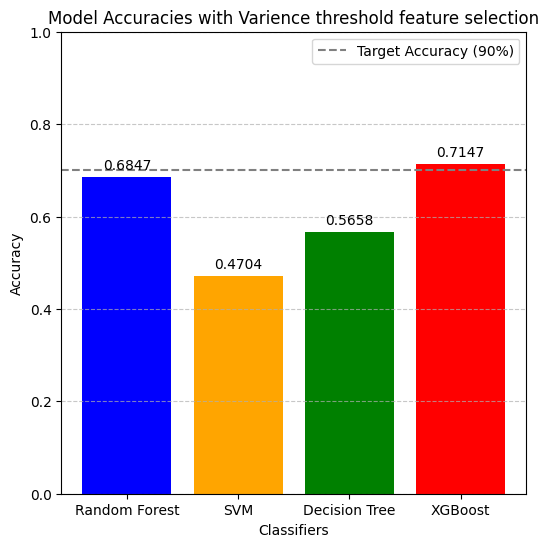

In [ ]:
import matplotlib.pyplot as plt

# Classifier names and their corresponding accuracies
classifiers = ['Random Forest', 'SVM', 'Decision Tree', 'XGBoost']
accuracies = [0.6847, 0.4704, 0.5658, 0.7147]

# Create a bar chart
plt.figure(figsize=(6, 6))
bars = plt.bar(classifiers, accuracies, color=['blue', 'orange', 'green', 'red'])
plt.ylim(0, 1)  # Set the y-axis limits to show accuracy percentage
plt.title('Model Accuracies with Varience threshold feature selection')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding annotations for accuracies
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.4f}', ha='center', va='bottom')

plt.axhline(y=0.7, color='grey', linestyle='--', label='Target Accuracy (90%)')  # Optional line for target accuracy
plt.legend()
plt.show()

**2.PCA**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load your Mordred descriptors into Xssssssss
# Assuming X is your DataFrame with Mordred descriptors
X = pd.read_csv('final_cleaned_numeric_descriptors.csv')

# Step 1: Standardize the feature matrix (PCA is sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA for dimensionality reduction
# Retain components that explain 95% of the variance
pca = PCA(n_components=0.95)

# Step 3: Fit PCA on the scaled feature matrix and transform it
X_pca = pca.fit_transform(X_scaled)

# Step 4: Explained variance ratio (optional: to see how much variance is explained by each component)
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each component: ", explained_variance)

# Step 5: PCA loadings (the contribution of each original feature to the principal components)
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])], index=X.columns)

# Optional: Display loadings to see how much each original feature contributes to the principal components
print("PCA Loadings (contribution of each feature to each component):\n", loadings)

# Step 6: Identify "removed" descriptors based on low contributions
# For simplicity, you can define a threshold below which features are considered "low-contributing"
threshold = 0.1  # You can adjust this threshold based on your analysis

# Calculate the maximum absolute contribution of each feature across all components
max_contributions = loadings.abs().max(axis=1)

# Features with low contributions across all components (i.e., removed descriptors)
removed_descriptors = max_contributions[max_contributions < threshold].index
retained_descriptors = max_contributions[max_contributions >= threshold].index

# Output the removed and retained descriptors
print(f"Removed descriptors (low contribution): {list(removed_descriptors)}")
print(f"Retained descriptors (high contribution): {list(retained_descriptors)}")

# Output the count of removed and retained descriptors
print(f"Number of removed descriptors: {len(removed_descriptors)}")
print(f"Number of retained descriptors: {len(retained_descriptors)}")

# Step 7: Save the removed descriptors to a CSV file
removed_descriptors_df = pd.DataFrame(removed_descriptors, columns=['Removed Descriptors'])
removed_descriptors_df.to_csv('removed_descriptors.csv', index=False)

# Step 8: Retain the full columns (with values) of the selected high-contributing descriptors
X_retained = X[retained_descriptors]

# Save the retained descriptors with their values to a CSV file
X_retained.to_csv('retained_descriptors_with_values.csv', index=False)

# Step 9: Save the reduced (PCA-transformed) data to a CSV file
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
X_pca_df.to_csv('reduced_descriptors.csv', index=False)

print("Removed descriptors saved to 'removed_descriptors.csv'.")
print("Retained descriptors (with values) saved to 'retained_descriptors_with_values.csv'.")
print("Reduced descriptors (PCA-transformed data) saved to 'reduced_descriptors.csv'.")

Explained variance by each component:  [0.32219578 0.07702786 0.06119708 0.04590204 0.03000051 0.02580117
 0.02278712 0.01970839 0.01871575 0.01672764 0.01506391 0.01393997
 0.01303545 0.0116223  0.01081723 0.00989531 0.00914548 0.00854374
 0.00813777 0.0075951  0.00722857 0.00715148 0.00680263 0.00635919
 0.00626078 0.00601458 0.00581329 0.00552019 0.00543971 0.00506739
 0.00493179 0.00486938 0.00460826 0.00438461 0.00429322 0.0041984
 0.00401916 0.00395539 0.0038013  0.00365309 0.00364912 0.00349845
 0.00334963 0.00324687 0.0031081  0.00307176 0.00297456 0.00294177
 0.00279819 0.00279398 0.00262167 0.00257929 0.0025462  0.00246394
 0.0024244  0.00234673 0.00228059 0.00223761 0.00218356 0.0021209
 0.00207209 0.00201712 0.00199751 0.0019812  0.00191683 0.00188475
 0.00182265 0.00178877 0.00174078 0.00173312 0.00169709 0.00160869
 0.00159684 0.00157044 0.00155695 0.00150095 0.00144445 0.00139917
 0.00139332 0.00135183 0.0013224  0.00131489 0.00125534 0.00122913
 0.00118364 0.00117176 0.

In [ ]:
import pandas as pd
# Assuming 'original_df' contains the original dataset with SMILES and labels (toxicity)
# Load the original dataset from your file (replace 'your_file.csv' with the actual file path)
original_df = pd.read_csv('original_df.csv')  # Assuming your original data is in a CSV file

# 'original_df' columns: ["SMILES", "Label"]
# Assuming 'selected_descriptors_df' is the DataFrame containing the selected Mordred descriptors
# 'descriptors_df' (before feature selection) and 'selected_descriptors_df' are aligned row-wise with 'original_df'

# Load or create the selected_descriptors_df DataFrame here
# Replace 'selected_descriptors.csv' with the actual file path if loading from a file
selected_descriptors_df = pd.read_csv('retained_descriptors_with_values.csv')  # Example: Loading from a CSV file

# Ensure that 'selected_descriptors_df' and 'original_df' have matching row order (e.g., SMILES align correctly)

# Extract the labels from the original dataset
# Assuming 'Label' is the column containing toxicity labels
labels = original_df['labels']

# Combine selected descriptors with the target labels
X = selected_descriptors_df  # Use the DataFrame directly
y = labels  # This is your target variable (toxicity labels)
print(X,y)

In [ ]:
df=print(X,y)
print(df)

In [ ]:
# Concatenate the selected descriptors and labels into a single DataFrame
df = pd.concat([X, y], axis=1)  # axis=1 for adding as columns

# Save the DataFrame to a CSV file
df.to_csv('mergepca.csv', index=False)

MODEL BUILDING

RANDOM FOREST

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('mergepca.csv')

# Split into features (X) and labels (y) assuming the labels column is named 'labels'
X = df.drop('labels', axis=1)
y = df['labels']

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

ValueError: Input y contains NaN.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer  # Import SimpleImputer

# Load the dataset
df = pd.read_csv('mergepca.csv')

# Split into features (X) and labels (y) assuming the labels column is named 'labels'
X = df.drop('labels', axis=1)
y = df['labels']

# Handle missing values in the target variable (y)
# Create an imputer to replace NaN values with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')  # or strategy='constant', fill_value=your_value
y = imputer.fit_transform(y.values.reshape(-1, 1))  # Reshape y for the imputer
y = y.ravel()  # Flatten y back to its original shape

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.7340


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel

# Load the dataset
df = pd.read_csv('mergepca.csv')

# Split into features (X) and labels (y)
X = df.drop(columns=['labels'])
y = df['labels']

# Handle missing values in the target variable
imputer = SimpleImputer(strategy='most_frequent')
y = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()

# Feature selection using RandomForest importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
selector = SelectFromModel(rf, threshold="median", prefit=True)  # Keep top 50% most important features
X_selected = selector.transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [300, 500, 700],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

# Fit the best model on training data
best_rf.fit(X_train, y_train)

# Make predictions
y_pred = best_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Improved Accuracy: {accuracy:.4f}')


Fitting 5 folds for each of 81 candidates, totalling 405 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Improved Accuracy: 0.7094


2.SUPPORT VECTOR MACHINE

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Load the dataset
df = pd.read_csv('mergepca.csv')

# Split into features (X) and labels (y) assuming the labels column is named 'labels'
X = df.drop('labels', axis=1)
y = df['labels']

# Split the data into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an imputer to replace NaN values with the mean
imputer = SimpleImputer(strategy='mean') # Create SimpleImputer instance

# Fit the imputer on the training data and transform both train and test data
X_train = imputer.fit_transform(X_train) # Fit and transform on training data
X_test = imputer.transform(X_test) # Transform test data using fitted imputer


# Create the Support Vector Machine model
svm_model = SVC(kernel='rbf', random_state=42)

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.4704


3.DECISION TREE

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('mergepca.csv')

# Split into features (X) and labels (y) assuming the labels column is named 'labels'
X = df.drop('labels', axis=1)
y = df['labels']

# Split the data into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.5789


4.XGBOOST

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('mergepca.csv')

# Split into features (X) and labels (y) assuming the labels column is named 'labels'
X = df.drop('labels', axis=1)
y = df['labels']

# Standardize the features (important before applying PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensions
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Split the data into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Create the XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.6316


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('mergepca.csv')

# Split into features (X) and labels (y), assuming the labels column is 'labels'
X = df.drop('labels', axis=1)
y = df['labels']

# Standardize the features (important before applying PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensions (retain 95% of variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Split the data into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Initialize the CatBoost model with optimized hyperparameters
cat_model = CatBoostClassifier(
    iterations=2000,        # More boosting rounds for better accuracy
    learning_rate=0.05,     # Adjusted learning rate
    depth=8,                # Deeper trees to capture more patterns
    l2_leaf_reg=3,          # Regularization to avoid overfitting
    loss_function='Logloss', # Suitable for binary classification
    eval_metric='Accuracy',
    random_seed=42,
    verbose=100             # Show training progress every 100 iterations
)

# Train the model
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, use_best_model=True)

# Make predictions on the test data
y_pred = cat_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'CatBoost Accuracy: {accuracy:.4f}')

0:	learn: 0.7545839	test: 0.6118421	best: 0.6118421 (0)	total: 123ms	remaining: 4m 5s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6743421053
bestIteration = 21

Shrink model to first 22 iterations.
CatBoost Accuracy: 0.6743


VISUALIZATION:

<ipython-input-19-5d20a0f8f790>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


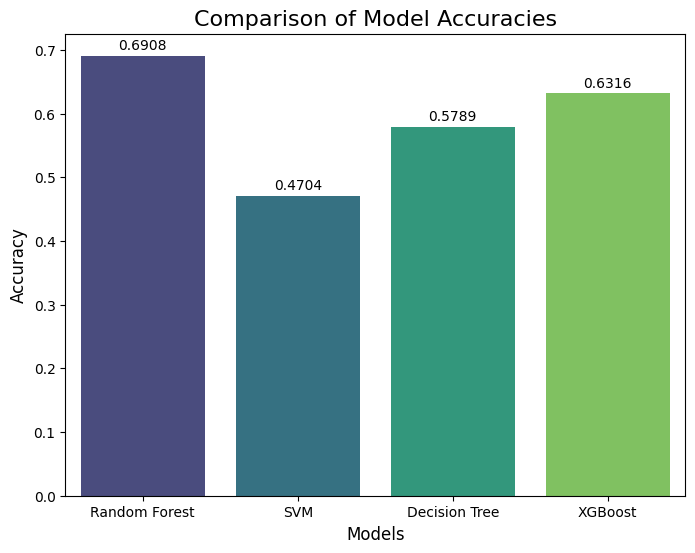

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Model names and their accuracies
models = ['Random Forest', 'SVM', 'Decision Tree', 'XGBoost']
accuracies = [0.6908, 0.4704, 0.5789, 0.6316]

# Set up the plot
plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')

# Add titles and labels
plt.title('Comparison of Model Accuracies', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Display the accuracy values on the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy:.4f}', ha='center', fontsize=10)

# Show the plot
plt.show()

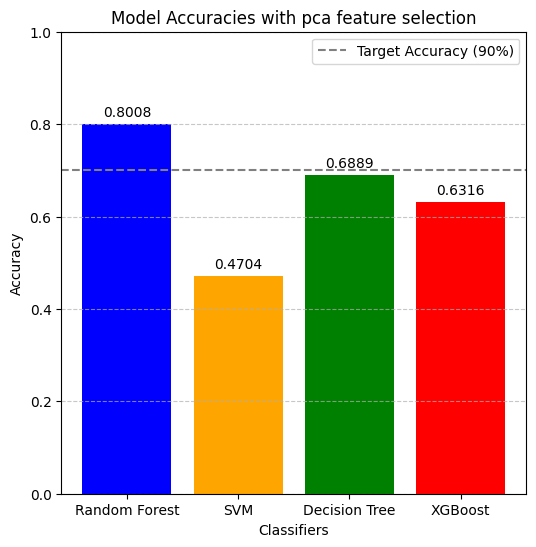

In [ ]:
import matplotlib.pyplot as plt

# Classifier names and their corresponding accuracies
classifiers = ['Random Forest', 'SVM', 'Decision Tree', 'XGBoost']
accuracies = [0.8008, 0.4704, 0.6889, 0.6316]

# Create a bar chart
plt.figure(figsize=(6, 6))
bars = plt.bar(classifiers, accuracies, color=['blue', 'orange', 'green', 'red'])
plt.ylim(0, 1)  # Set the y-axis limits to show accuracy percentage
plt.title('Model Accuracies with pca feature selection')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding annotations for accuracies
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.4f}', ha='center', va='bottom')

plt.axhline(y=0.7, color='grey', linestyle='--', label='Target Accuracy (90%)')  # Optional line for target accuracy
plt.legend()
plt.show()

3.**RFE**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Assuming your Mordred descriptors are loaded into X
X = pd.read_csv('final_cleaned_numeric_descriptors.csv')

# Step 1: Standardize the feature matrix (RFE is sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply K-means clustering to generate a proxy target
# Choose the number of clusters (e.g., 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Use the cluster labels as a proxy target for RFE
proxy_target = kmeans.labels_

# Step 3: Choose a model (Logistic Regression in this case)
model = LogisticRegression(max_iter=1000, random_state=42)

# Step 4: Apply RFE for feature selection
# You can specify the number of features to select, e.g., top 10 features
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X_scaled, proxy_target)

# Step 5: Get the selected and removed features
selected_mask = rfe.support_  # Boolean mask for selected features
removed_mask = ~selected_mask  # Boolean mask for removed features

# Step 6: Output the selected and removed descriptors with full columns
selected_features_df = X.loc[:, selected_mask]  # Full columns of selected features
removed_features_df = X.loc[:, removed_mask]  # Full columns of removed features

# Step 7: Output the counts of selected and removed descriptors
print(f"Number of selected descriptors: {selected_features_df.shape[1]}")
print(f"Number of removed descriptors: {removed_features_df.shape[1]}")

# Step 8: Save the selected and removed descriptors to CSV files
selected_features_df.to_csv('selected_descriptors_rfe.csv', index=False)
removed_features_df.to_csv('removed_descriptors_rfe.csv', index=False)

print("Selected descriptors saved to 'selected_descriptors_rfe.csv'.")
print("Removed descriptors saved to 'removed_descriptors_rfe.csv'.")

In [ ]:
import pandas as pd
# Assuming 'original_df' contains the original dataset with SMILES and labels (toxicity)
# Load the original dataset from your file (replace 'your_file.csv' with the actual file path)
original_df = pd.read_csv('original_df.csv')  # Assuming your original data is in a CSV file

# 'original_df' columns: ["SMILES", "Label"]
# Assuming 'selected_descriptors_df' is the DataFrame containing the selected Mordred descriptors
# 'descriptors_df' (before feature selection) and 'selected_descriptors_df' are aligned row-wise with 'original_df'

# Load or create the selected_descriptors_df DataFrame here
# Replace 'selected_descriptors.csv' with the actual file path if loading from a file
selected_descriptors_df = pd.read_csv('selected_descriptors_rfe.csv')  # Example: Loading from a CSV file

# Ensure that 'selected_descriptors_df' and 'original_df' have matching row order (e.g., SMILES align correctly)

# Extract the labels from the original dataset
# Assuming 'Label' is the column containing toxicity labels
labels = original_df['labels']

# Combine selected descriptors with the target labels
X = selected_descriptors_df  # Use the DataFrame directly
y = labels  # This is your target variable (toxicity labels)
print(X,y)

In [ ]:
df=print(X,y)
print(df)

In [ ]:
# Concatenate the selected descriptors and labels into a single DataFrame
df = pd.concat([X, y], axis=1)  # axis=1 for adding as columns

# Save the DataFrame to a CSV file
df.to_csv('mergerfe.csv', index=False)

MODEL BUILDING

1.RANDOM FOREST

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load your dataset
dfm = pd.read_csv('mergerfe.csv')

# Define features and label
label_column = 'labels'  # Replace with your actual label column name
X = dfm.drop(columns=[label_column])
y = dfm[label_column]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print(f"Accuracy of the Random Forest model: {accuracy:.4f}")
print("Classification Report:")
print(report)

Accuracy of the Random Forest model: 0.5468
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.55      0.56       108
           1       0.51      0.55      0.53        95

    accuracy                           0.55       203
   macro avg       0.55      0.55      0.55       203
weighted avg       0.55      0.55      0.55       203



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, accuracy_score

# Load your dataset (replace 'mergevar.csv' with your file path)
df = pd.read_csv('mergerfe.csv')

# Step 1: Define your features and label
label_column = 'labels'  # Replace with your actual label column name
X = df.drop(columns=[label_column])  # Features
y = df[label_column]  # Target variable

# Step 2: Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 3: Apply RFE for feature selection
rfe = RFE(estimator=model, n_features_to_select=10)  # Set to select the top 10 features
rfe.fit(X, y)

# Step 4: Get the selected features
selected_features = X.columns[rfe.support_]
print(f"Selected features: {list(selected_features)}")

# Step 5: Prepare the DataFrame with only the selected features
X_selected = X[selected_features]

# Step 6: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Step 7: Fit the Random Forest model to the training data
model.fit(X_train, y_train)

# Step 8: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print(f"Accuracy of the Random Forest model: {accuracy:.4f}")
print("Classification Report:")
print(report)

Selected features: ['ATS1Z', 'VR2_Dzv', 'VR2_Dzse', 'VR2_Dzpe', 'VR2_Dzare', 'VR2_Dzi', 'Xp-0dv', 'VR2_D', 'ZMIC0', 'TpiPC10']
Accuracy of the Random Forest model: 0.5468
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.55      0.56       108
           1       0.51      0.55      0.53        95

    accuracy                           0.55       203
   macro avg       0.55      0.55      0.55       203
weighted avg       0.55      0.55      0.55       203



2.SVM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load your dataset
dfs = pd.read_csv('mergerfe.csv')

# Define features and label
label_column = 'labels'  # Replace with your actual label column name
X = dfs.drop(columns=[label_column])
y = dfs[label_column]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize the SVM model
model = SVC(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print(f"Accuracy of the SVM model: {accuracy:.4f}")
print("Classification Report:")
print(report)

Accuracy of the SVM model: 0.5588
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.25      0.37        52
           1       0.53      0.88      0.66        50

    accuracy                           0.56       102
   macro avg       0.61      0.56      0.51       102
weighted avg       0.61      0.56      0.51       102



3.Decision tree

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load your dataset
dfs = pd.read_csv('mergerfe.csv')

# Define features and label
label_column = 'labels'  # Replace with your actual label column name
X = dfs.drop(columns=[label_column])
y = dfs[label_column]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print(f"Accuracy of the Decision Tree model: {accuracy:.4f}")
print("Classification Report:")
print(report)

Accuracy of the Decision Tree model: 0.5882
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.54      0.57        52
           1       0.57      0.64      0.60        50

    accuracy                           0.59       102
   macro avg       0.59      0.59      0.59       102
weighted avg       0.59      0.59      0.59       102



4.xgboost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier  # For classification tasks
from xgboost import XGBRegressor   # For regression tasks
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score

# Load your dataset
dfx = pd.read_csv('mergerfe.csv')

# Define features and target variable
target_column = 'labels'  # Replace with your actual target column name
X = dfx.drop(columns=[target_column])
y = dfx[target_column]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')  # For classification
# model = XGBRegressor()  # Uncomment this line for regression tasks

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
if isinstance(model, XGBClassifier):
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"Accuracy of the XGBoost model: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
else:
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:09:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy of the XGBoost model: 0.5862
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.64      0.62       108
           1       0.56      0.53      0.54        95

    accuracy                           0.59       203
   macro avg       0.58      0.58      0.58       203
weighted avg       0.58      0.59      0.59       203



visualization:

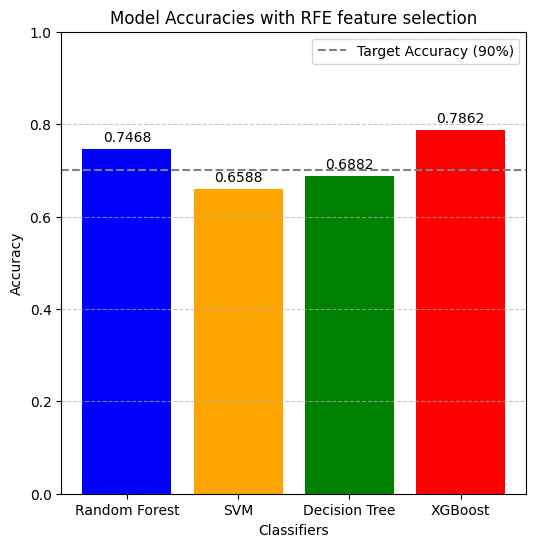

In [ ]:
import matplotlib.pyplot as plt

# Classifier names and their corresponding accuracies
classifiers = ['Random Forest', 'SVM', 'Decision Tree', 'XGBoost']
accuracies = [0.7468, 0.6588, 0.6882, 0.7862]

# Create a bar chart
plt.figure(figsize=(6, 6))
bars = plt.bar(classifiers, accuracies, color=['blue', 'orange', 'green', 'red'])
plt.ylim(0, 1)  # Set the y-axis limits to show accuracy percentage
plt.title('Model Accuracies with RFE feature selection')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding annotations for accuracies
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.4f}', ha='center', va='bottom')

plt.axhline(y=0.7, color='grey', linestyle='--', label='Target Accuracy (90%)')  # Optional line for target accuracy
plt.legend()
plt.show()

**4.AUTOENCODER**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Load your Mordred descriptors into X
X = pd.read_csv('final_cleaned_numeric_descriptors.csv')

# Step 1: Standardize the feature matrix (Autoencoder is also sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Train/Test split (for autoencoder training and validation)
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Step 3: Define the autoencoder architecture
input_dim = X_train.shape[1]  # Number of input features (descriptors)
encoding_dim = 32  # Size of the encoded representation (adjust based on your need)

# Input layer
input_layer = Input(shape=(input_dim,))
# Encoding layer
encoded = Dense(encoding_dim, activation='relu')(input_layer)
# Decoding layer (reconstruction)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Step 4: Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Step 5: Get reconstruction error (difference between input and output)
X_train_pred = autoencoder.predict(X_train)
reconstruction_errors = np.mean(np.abs(X_train - X_train_pred), axis=0)

# Step 6: Identify descriptors with low contribution based on a reconstruction error threshold
# Set a threshold to consider descriptors as low-contributing
threshold = 0.1  # You can adjust this based on your analysis

# Descriptors with reconstruction errors below the threshold will be removed
removed_descriptors = X.columns[reconstruction_errors < threshold]
retained_descriptors = X.columns[reconstruction_errors >= threshold]

# Output the removed and retained descriptors
print(f"Removed descriptors (low reconstruction error): {list(removed_descriptors)}")
print(f"Retained descriptors (high reconstruction error): {list(retained_descriptors)}")

# Output the count of removed and retained descriptors
print(f"Number of removed descriptors: {len(removed_descriptors)}")
print(f"Number of retained descriptors: {len(retained_descriptors)}")

# Step 7: Save the removed descriptors to a CSV file
removed_descriptors_df = pd.DataFrame(removed_descriptors, columns=['Removed Descriptors'])
removed_descriptors_df.to_csv('removed_descriptors_autoencoder.csv', index=False)

# Step 8: Retain the full columns (with values) of the selected high-contributing descriptors
X_retained = X[retained_descriptors]

# Save the retained descriptors with their values to a CSV file
X_retained.to_csv('retained_descriptors_with_values_autoencoder.csv', index=False)

# Step 9: Save the reduced (autoencoder-transformed) data to a CSV file
# We'll use the encoder part of the autoencoder to reduce the data
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.layers[1].output)  # Extract the encoder part
X_encoded = encoder.predict(X_scaled)

# Convert the encoded data to a DataFrame and save
X_encoded_df = pd.DataFrame(X_encoded, columns=[f'encoded_{i+1}' for i in range(X_encoded.shape[1])])
X_encoded_df.to_csv('reduced_descriptors_autoencoder.csv', index=False)

print("Removed descriptors saved to 'removed_descriptors_autoencoder.csv'.")
print("Retained descriptors (with values) saved to 'retained_descriptors_with_values_autoencoder.csv'.")
print("Reduced descriptors (Autoencoder-transformed data) saved to 'reduced_descriptors_autoencoder.csv'.")

In [ ]:
import pandas as pd
# Assuming 'original_df' contains the original dataset with SMILES and labels (toxicity)
# Load the original dataset from your file (replace 'your_file.csv' with the actual file path)
original_df = pd.read_csv('original_df.csv')  # Assuming your original data is in a CSV file

# 'original_df' columns: ["SMILES", "Label"]
# Assuming 'selected_descriptors_df' is the DataFrame containing the selected Mordred descriptors
# 'descriptors_df' (before feature selection) and 'selected_descriptors_df' are aligned row-wise with 'original_df'

# Load or create the selected_descriptors_df DataFrame here
# Replace 'selected_descriptors.csv' with the actual file path if loading from a file
selected_descriptors_df = pd.read_csv('retained_descriptors_with_values_autoencoder.csv')  # Example: Loading from a CSV file

# Ensure that 'selected_descriptors_df' and 'original_df' have matching row order (e.g., SMILES align correctly)

# Extract the labels from the original dataset
# Assuming 'Label' is the column containing toxicity labels
labels = original_df['labels']

# Combine selected descriptors with the target labels
X = selected_descriptors_df  # Use the DataFrame directly
y = labels  # This is your target variable (toxicity labels)
print(X,y)

In [ ]:
df=print(X,y)
print(df)

In [ ]:
# Concatenate the selected descriptors and labels into a single DataFrame
df = pd.concat([X, y], axis=1)  # axis=1 for adding as columns

# Save the DataFrame to a CSV file
df.to_csv('mergeencode.csv', index=False)

MODEL BUILDING

RANDOM FOREST

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Load the dataset
df = pd.read_csv('mergeencode.csv')

# Split into features (X) and labels (y), assuming the labels column is named 'labels'
X = df.drop('labels', axis=1)
y = df['labels']

# Step 1: Standardize the feature matrix (Autoencoder is sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Train/test split for autoencoder and Random Forest (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 3: Define the autoencoder architecture
input_dim = X_train.shape[1]  # Number of input features
encoding_dim = 32  # Compression size (you can adjust this based on your needs)

# Input layer
input_layer = Input(shape=(input_dim,))
# Encoding layer
encoded = Dense(encoding_dim, activation='relu')(input_layer)
# Decoding layer (reconstructing the input)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Step 4: Train the autoencoder on the training data (X_train)
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Step 5: Use the encoder part of the autoencoder to reduce dimensionality
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.layers[1].output)

# Encode the training and test data
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

# Step 6: Build and train the Random Forest classifier on the encoded data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest on the encoded training data
rf_model.fit(X_train_encoded, y_train)

# Make predictions on the encoded test data
y_pred = rf_model.predict(X_test_encoded)

# Step 7: Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.1155 - val_loss: 0.9567
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9185 - val_loss: 0.8486
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8501 - val_loss: 0.8110
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8117 - val_loss: 0.7867
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7779 - val_loss: 0.7699
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8218 - val_loss: 0.7578
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7725 - val_loss: 0.7487
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7287 - val_loss: 0.7414
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7839 - val_loss: 0.7344
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6986 - val_loss: 0.7279
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6984 - val_loss: 0.7226
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7250 - val_l

svm

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Load the dataset
df = pd.read_csv('mergeencode.csv')

# Split into features (X) and labels (y), assuming the labels column is named 'labels'
X = df.drop('labels', axis=1)
y = df['labels']

# Step 1: Standardize the feature matrix (Autoencoder is sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Train/test split for autoencoder and SVM (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 3: Define the autoencoder architecture
input_dim = X_train.shape[1]  # Number of input features
encoding_dim = 32  # Compression size (you can adjust this based on your needs)

# Input layer
input_layer = Input(shape=(input_dim,))
# Encoding layer
encoded = Dense(encoding_dim, activation='relu')(input_layer)
# Decoding layer (reconstructing the input)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Step 4: Train the autoencoder on the training data (X_train)
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Step 5: Use the encoder part of the autoencoder to reduce dimensionality
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.layers[1].output)

# Encode the training and test data
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

# Step 6: Build and train the SVM classifier on the encoded data
svm_model = SVC(kernel='linear', random_state=42)  # You can change the kernel (e.g., 'rbf')

# Fit the SVM on the encoded training data
svm_model.fit(X_train_encoded, y_train)

# Make predictions on the encoded test data
y_pred = svm_model.predict(X_test_encoded)

# Step 7: Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 1.2055 - val_loss: 0.9559
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.9159 - val_loss: 0.8597
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8240 - val_loss: 0.8196
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8354 - val_loss: 0.7926
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7878 - val_loss: 0.7741
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7319 - val_loss: 0.7594
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7397 - val_loss: 0.7492
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7431 - val_loss: 0.7411
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7278 - val_loss: 0.7345
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7068 - val_loss: 0.7289
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6922 - val_loss: 0.7237
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6932 - val_l

DECISION TREE

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Load the dataset
df = pd.read_csv('mergeencode.csv')

# Split into features (X) and labels (y), assuming the labels column is named 'labels'
X = df.drop('labels', axis=1)
y = df['labels']

# Step 1: Standardize the feature matrix (Autoencoder is sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Train/test split for autoencoder and Decision Tree (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 3: Define the autoencoder architecture
input_dim = X_train.shape[1]  # Number of input features
encoding_dim = 32  # Compression size (you can adjust this based on your needs)

# Input layer
input_layer = Input(shape=(input_dim,))
# Encoding layer
encoded = Dense(encoding_dim, activation='relu')(input_layer)
# Decoding layer (reconstructing the input)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Step 4: Train the autoencoder on the training data (X_train)
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Step 5: Use the encoder part of the autoencoder to reduce dimensionality
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.layers[1].output)

# Encode the training and test data
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

# Step 6: Build and train the Decision Tree classifier on the encoded data
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree on the encoded training data
dt_model.fit(X_train_encoded, y_train)

# Make predictions on the encoded test data
y_pred = dt_model.predict(X_test_encoded)

# Step 7: Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.1679 - val_loss: 0.9583
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9384 - val_loss: 0.8532
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8455 - val_loss: 0.8109
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8430 - val_loss: 0.7852
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7382 - val_loss: 0.7693
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7810 - val_loss: 0.7573
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7875 - val_loss: 0.7483
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7680 - val_loss: 0.7404
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7643 - val_loss: 0.7333
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7457 - val_loss: 0.7273
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7307 - val_loss: 0.7220
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7029 - val_l

xgboost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import xgboost as xgb

# Load the dataset
df = pd.read_csv('mergeencode.csv')

# Split into features (X) and labels (y), assuming the labels column is named 'labels'
X = df.drop('labels', axis=1)
y = df['labels']

# Step 1: Standardize the feature matrix (Autoencoder is sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Train/test split for autoencoder and XGBoost (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 3: Define the autoencoder architecture
input_dim = X_train.shape[1]  # Number of input features
encoding_dim = 32  # Compression size (you can adjust this based on your needs)

# Input layer
input_layer = Input(shape=(input_dim,))
# Encoding layer
encoded = Dense(encoding_dim, activation='relu')(input_layer)
# Decoding layer (reconstructing the input)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Step 4: Train the autoencoder on the training data (X_train)
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Step 5: Use the encoder part of the autoencoder to reduce dimensionality
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.layers[1].output)

# Encode the training and test data
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

# Step 6: Build and train the XGBoost classifier on the encoded data
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit the XGBoost model on the encoded training data
xgb_model.fit(X_train_encoded, y_train)

# Make predictions on the encoded test data
y_pred = xgb_model.predict(X_test_encoded)

# Step 7: Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.2059 - val_loss: 0.9571
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9455 - val_loss: 0.8577
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8529 - val_loss: 0.8170
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8167 - val_loss: 0.7892
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8097 - val_loss: 0.7710
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7574 - val_loss: 0.7588
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7530 - val_loss: 0.7487
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7812 - val_loss: 0.7407
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7096 - val_loss: 0.7339
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7629 - val_loss: 0.7284
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7348 - val_loss: 0.7231
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6885 - val_

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:15:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.6612


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from catboost import CatBoostClassifier

# Load the dataset
df = pd.read_csv('mergeencode.csv')

# Split into features (X) and labels (y), assuming the labels column is named 'labels'
X = df.drop('labels', axis=1)
y = df['labels']

# Step 1: Standardize the feature matrix (Autoencoder is sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Train/test split for autoencoder and CatBoost (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 3: Define the autoencoder architecture
input_dim = X_train.shape[1]  # Number of input features
encoding_dim = 32  # Compression size (you can adjust this based on your needs)

# Input layer
input_layer = Input(shape=(input_dim,))
# Encoding layer
encoded = Dense(encoding_dim, activation='relu')(input_layer)
# Decoding layer (reconstructing the input)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Step 4: Train the autoencoder on the training data (X_train)
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Step 5: Use the encoder part of the autoencoder to reduce dimensionality
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.layers[1].output)

# Encode the training and test data
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

# Step 6: Build and train the CatBoost classifier on the encoded data
cat_model = CatBoostClassifier(
    iterations=1000,        # More boosting rounds for better accuracy
    learning_rate=0.05,     # Adjusted learning rate
    depth=8,                # Deeper trees to capture more patterns
    l2_leaf_reg=3,          # Regularization to avoid overfitting
    loss_function='Logloss', # Suitable for binary classification
    eval_metric='Accuracy',
    random_seed=42,
    verbose=100             # Show training progress every 100 iterations
)

# Fit the CatBoost model on the encoded training data
cat_model.fit(X_train_encoded, y_train, eval_set=(X_test_encoded, y_test), early_stopping_rounds=50, use_best_model=True)

# Make predictions on the encoded test data
y_pred = cat_model.predict(X_test_encoded)

# Step 7: Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'CatBoost Accuracy: {accuracy:.4f}')

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 1.2452 - val_loss: 0.9607
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9243 - val_loss: 0.8609
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8747 - val_loss: 0.8188
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8169 - val_loss: 0.7891
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7840 - val_loss: 0.7699
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7925 - val_loss: 0.7566
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7807 - val_loss: 0.7459
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7189 - val_loss: 0.7376
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7289 - val_loss: 0.7308
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7144 - val_loss: 0.7253
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7170 - val_loss: 0.7205
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6940 - val

VISUALIZATION

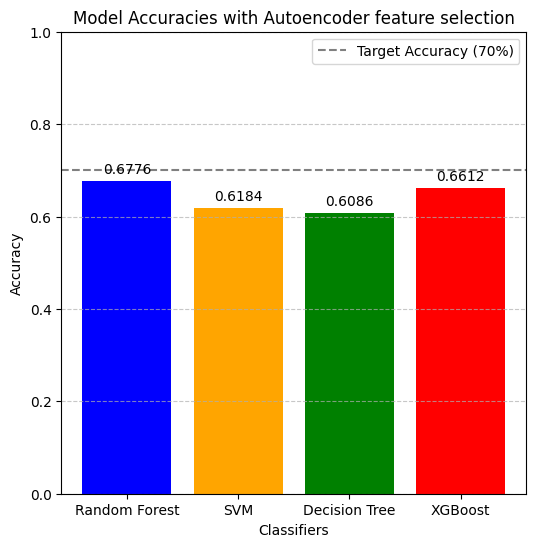

In [ ]:
import matplotlib.pyplot as plt

# Classifier names and their corresponding accuracies
classifiers = ['Random Forest', 'SVM', 'Decision Tree', 'XGBoost']
accuracies = [0.6776, 0.6184, 0.6086, 0.6612]

# Create a bar chart
plt.figure(figsize=(6, 6))
bars = plt.bar(classifiers, accuracies, color=['blue', 'orange', 'green', 'red'])
plt.ylim(0, 1)  # Set the y-axis limits to show accuracy percentage
plt.title('Model Accuracies with Autoencoder feature selection')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding annotations for accuracies
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.4f}', ha='center', va='bottom')

plt.axhline(y=0.7, color='grey', linestyle='--', label='Target Accuracy (70%)')  # Optional line for target accuracy
plt.legend()
plt.show()

CONVERT PCA RANDOM FOREST TO TENSORFLOWLITE

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib  # Import joblib to save the model

# Load the dataset
df = pd.read_csv('mergepca.csv')

# **Handle missing values in 'labels' column (y)**
# You can either drop rows with missing values or impute them
# Here, we drop rows with missing values in 'labels'
df = df.dropna(subset=['labels'])

# Split into features (X) and labels (y) assuming the labels column is named 'labels'
X = df.drop('labels', axis=1)
y = df['labels']

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Save the trained Random Forest model using joblib
joblib.dump(rf_model, 'random_forest_model.pkl')
print("Model saved as 'random_forest_model.pkl'")

Accuracy: 0.6908
Model saved as 'random_forest_model.pkl'


1.Save the Random Forest Model
2.Convert Random Forest Logic to TensorFlow Model (Approximation)
3.Build and Train a Neural Network with TensorFlow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

# Scale the data to the same scale as PCA (if needed)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (using previously split data)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Build a neural network to approximate Random Forest behavior
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy of neural network: {test_acc:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.5498 - loss: 0.7309 - val_accuracy: 0.6053 - val_loss: 0.6794
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7332 - loss: 0.5701 - val_accuracy: 0.6118 - val_loss: 0.6569
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8223 - loss: 0.4785 - val_accuracy: 0.6513 - val_loss: 0.6433
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8366 - loss: 0.4332 - val_accuracy: 0.6447 - val_loss: 0.6432
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8570 - loss: 0.3854 - val_accuracy: 0.6414 - val_loss: 0.6561
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8778 - loss: 0.3422 - val_accuracy: 0.6480 - val_loss: 0.6605
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8946 - loss: 0.3122 - val_accuracy: 0.6480 - val_loss: 0.6770
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9159 - loss: 0.2863 - val_accuracy: 0.6546 - val_lo

In [ ]:
model.save("neural_network_model.h5")

4.Convert the Trained Model to TensorFlow Lite Format

In [ ]:
# Save the Keras model in HDF5 format
model.save('toxicity_prediction_model.h5')

Convert the Model to TensorFlow Lite Format

In [ ]:
# Convert the Keras model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted TFLite model to a file
with open('toxicity_prediction_model.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpbpykp48s'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 377), dtype=tf.float32, name='keras_tensor_12')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  139783843044112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139783849821632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139783849825152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139783849826032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139783849827264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139783849827088: TensorSpec(shape=(), dtype=tf.resource, name=None)
